# Лабораторная работа 4


Загружаем `MNIST`


In [10]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Выводим тестовое изображение


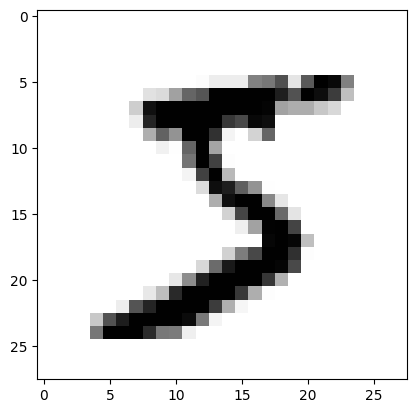

5


In [11]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.show()
print(train_labels[0])

Напишем функцию для вывода и сравнения графиков


In [12]:
def plot_model_comparison(histories, model_names=None):
    if model_names is None:
        model_names = [f"Model {i+1}" for i in range(len(histories))]

    for i, history in enumerate(histories):
        plt.plot(history.history['loss'],
                 label=f'{model_names[i]} - Training Loss')
        # plt.plot(history.history['val_loss'], label=f'{model_names[i]} - Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Comparison of Training and Validation Loss')
    plt.legend()
    plt.show()

    for i, history in enumerate(histories):
        plt.plot(history.history['accuracy'],
                 label=f'{model_names[i]} - Training Accuracy')
        # plt.plot(history.history['val_accuracy'], label=f'{model_names[i]} - Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Comparison of Training and Validation Accuracy')
    plt.legend()
    plt.show()

Нормализуем данные


In [13]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Разделяем метки по категориям


In [14]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Задаем архитектуру сети


In [15]:
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

Чтобы подготовить сеть к обучению, нужно настроить еще три параметра для этапа
компиляции:

1. функцию потерь, которая определяет, как сеть должна оценивать качество своей
   работы на обучающих данных и, соответственно, как корректировать ее в
   правильном направлении;
2. оптимизатор — механизм, с помощью которого сеть будет обновлять себя, опираясь
   на наблюдаемые данные и функцию потерь;
3. метрики для мониторинга на этапах обучения и тестирования — здесь нас будет
   интересовать только точность (доля правильно классифицированных
   изображений).


In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

Обучаем


In [17]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.3055 - accuracy: 0.9141
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1342 - accuracy: 0.9619
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0917 - accuracy: 0.9738
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0692 - accuracy: 0.9796
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0528 - accuracy: 0.9848


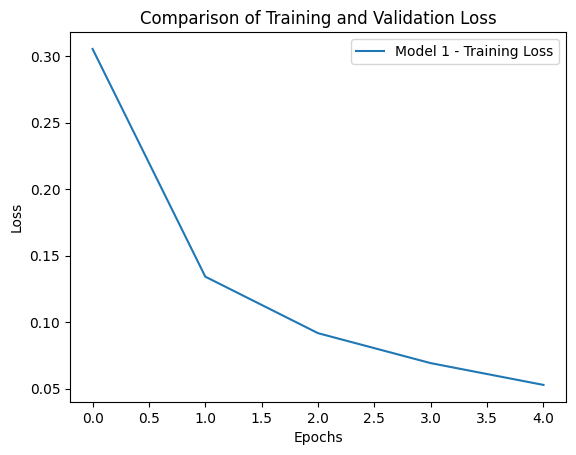

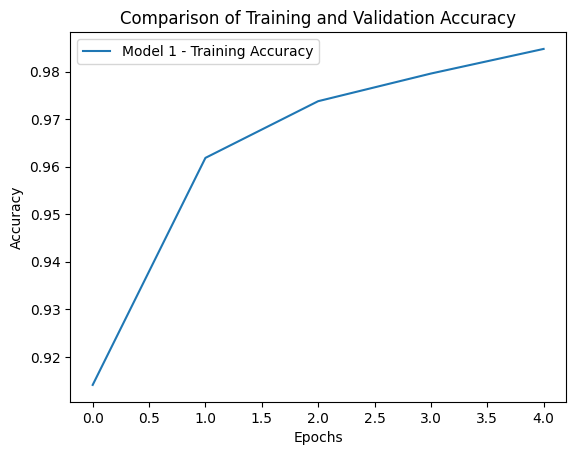

In [18]:
plot_model_comparison(histories=[history])

Теперь проверим, как модель распознает контрольный набор


In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0754 - accuracy: 0.9761
test_acc: 0.9761000275611877


## Доп задания


1. Найти архитектуру сети, при которой точность классификации будет не менее 95%


In [20]:
model_cnn = Sequential()

# Первый сверточный слой, 32 фильтра размером 3x3, активация ReLU, и входной размер
model_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Слой подвыборки (макспулинг) для уменьшения размерности, 2x2 окно
model_cnn.add(MaxPooling2D((2, 2)))

# Второй сверточный слой, 64 фильтра размером 3x3, активация ReLU
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
# Еще один слой подвыборки 2x2
model_cnn.add(MaxPooling2D((2, 2)))

# Третий сверточный слой, 64 фильтра, размер 3x3
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))

# Преобразуем данные в одномерный вид, чтобы подключить полносвязные слои
model_cnn.add(Flatten())

# Полносвязный слой с 64 нейронами, активация ReLU
model_cnn.add(Dense(64, activation='relu'))

# Выходной слой с 10 нейронами (по числу классов), активация softmax для вероятностей
model_cnn.add(Dense(10, activation='softmax'))

In [21]:
model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy', metrics=['accuracy'])


history_cnn = model_cnn.fit(
    train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 29s 59ms/step - loss: 0.2498 - accuracy: 0.9255
Epoch 2/10
469/469 [==============================] - 26s 54ms/step - loss: 0.0637 - accuracy: 0.9804
Epoch 3/10
469/469 [==============================] - 30s 63ms/step - loss: 0.0430 - accuracy: 0.9866
Epoch 4/10
469/469 [==============================] - 35s 74ms/step - loss: 0.0335 - accuracy: 0.9893
Epoch 5/10
469/469 [==============================] - 28s 59ms/step - loss: 0.0267 - accuracy: 0.9917
Epoch 6/10
469/469 [==============================] - 29s 62ms/step - loss: 0.0229 - accuracy: 0.9922
Epoch 7/10
469/469 [==============================] - 25s 54ms/step - loss: 0.0184 - accuracy: 0.9939
Epoch 8/10
469/469 [==============================] - 31s 66ms/step - loss: 0.0153 - accuracy: 0.9952
Epoch 9/10
469/469 [==============================] - 30s 64ms/step - loss: 0.0132 - accuracy: 0.9958
Epoch 10/10
469/469 [==============================] - 30s 65ms/step - loss: 0.011

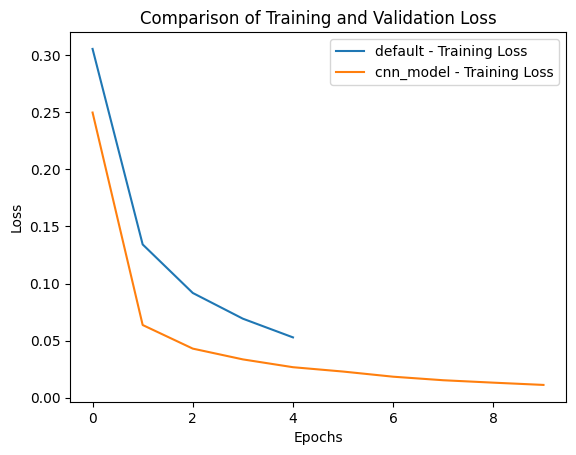

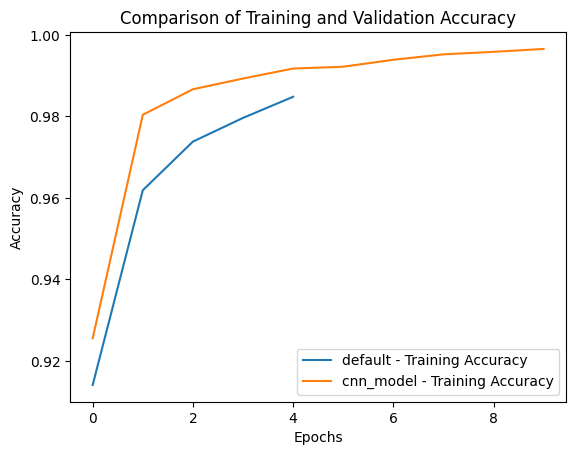

In [22]:
plot_model_comparison(histories=[history, history_cnn], model_names=[
                      "default", "cnn_model"])

Пробуем не сверточной


In [23]:
model_MLP = Sequential()
model_MLP.add(Flatten())
model_MLP.add(Dense(512, activation='relu'))
model_MLP.add(Dense(256, activation='relu'))
model_MLP.add(Dense(10, activation='softmax'))

model_MLP.compile(optimizer='Nadam',
                  loss='categorical_crossentropy', metrics=['accuracy'])

history_MLP = model_MLP.fit(
    train_images, train_labels, epochs=10, batch_size=64)

Epoch 1/10
938/938 [==============================] - 8s 7ms/step - loss: 0.1967 - accuracy: 0.9416
Epoch 2/10
938/938 [==============================] - 9s 10ms/step - loss: 0.0754 - accuracy: 0.9768
Epoch 3/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0521 - accuracy: 0.9833
Epoch 4/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0385 - accuracy: 0.9872
Epoch 5/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0283 - accuracy: 0.9910
Epoch 6/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0269 - accuracy: 0.9912
Epoch 7/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0185 - accuracy: 0.9937
Epoch 8/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0186 - accuracy: 0.9938
Epoch 9/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0162 - accuracy: 0.9945
Epoch 10/10
938/938 [==============================] - 9s 10ms/step - loss: 0.0157 - accuracy: 0.99

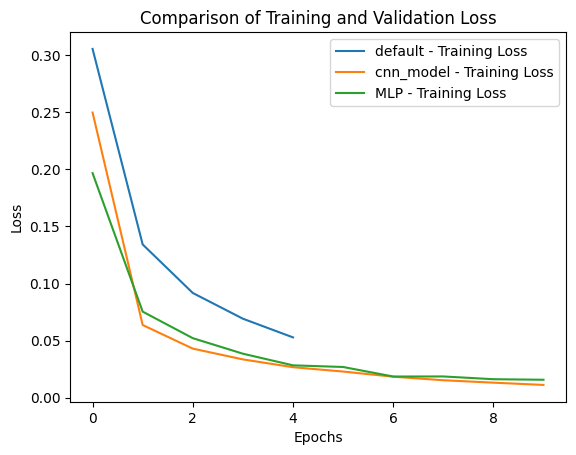

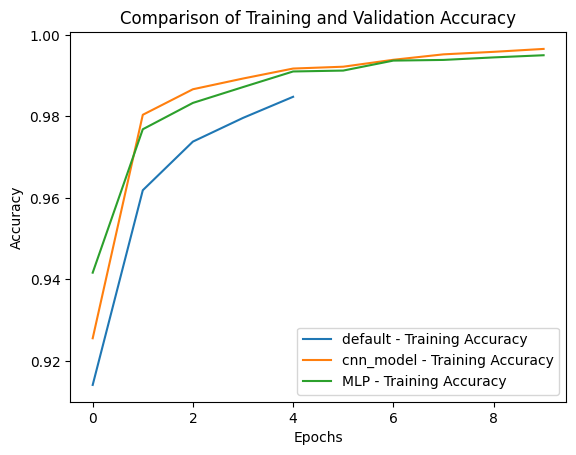

In [24]:
plot_model_comparison(histories=[history, history_cnn, history_MLP], model_names=[
                      "default", "cnn_model", 'MLP'])

2. Исследовать влияние различных оптимизаторов, а также их параметров, на процесс
   обучения


In [25]:
model_RMS = Sequential()
model_RMS.add(Flatten())
model_RMS.add(Dense(256, activation='relu'))
model_RMS.add(Dense(10, activation='softmax'))

model_RMS.compile(optimizer='RMSprop',
                  loss='categorical_crossentropy', metrics=['accuracy'])

history_RMS = model_RMS.fit(
    train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 4s 4ms/step - loss: 0.2520 - accuracy: 0.9265
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1076 - accuracy: 0.9675
Epoch 3/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0733 - accuracy: 0.9780
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0554 - accuracy: 0.9832
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0435 - accuracy: 0.9871


In [26]:
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
model_Nadam = Sequential()
model_Nadam.add(Flatten())
model_Nadam.add(Dense(256, activation='relu'))
model_Nadam.add(Dense(10, activation='softmax'))

model_Nadam.compile(optimizer='Nadam',
                    loss='categorical_crossentropy', metrics=['accuracy'])

history_Nadam = model_Nadam.fit(
    train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 5s 4ms/step - loss: 0.2646 - accuracy: 0.9263
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1080 - accuracy: 0.9674
Epoch 3/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0713 - accuracy: 0.9783
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0517 - accuracy: 0.9847
Epoch 5/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0389 - accuracy: 0.9881


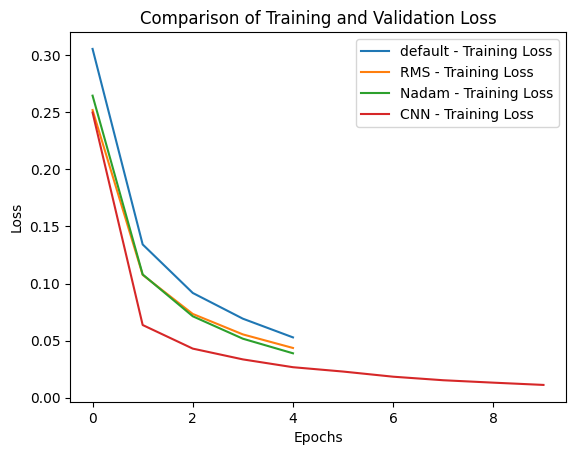

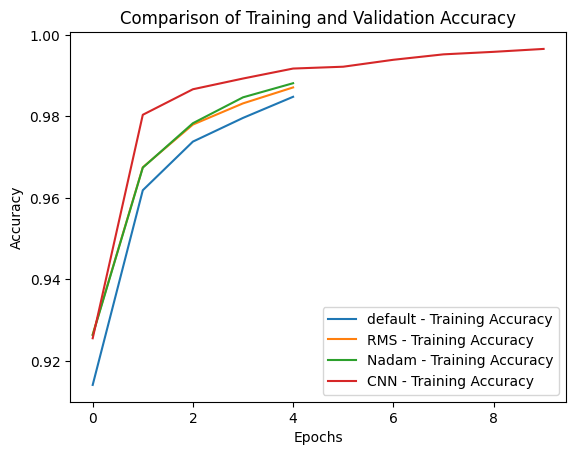

In [27]:
plot_model_comparison(histories=[history, history_RMS, history_Nadam, history_cnn], model_names=[
                      'default', 'RMS', 'Nadam', 'CNN'])

3. Написать функцию, которая позволит загружать пользовательское изображение не
   из датасета


функция для загрузки и обработки пользовательского изображения


Нарисуем изображение запустив [код](draw.py)


model_MLP
1/1 [==============================] - 0s 45ms/step
Распознанное число: 4


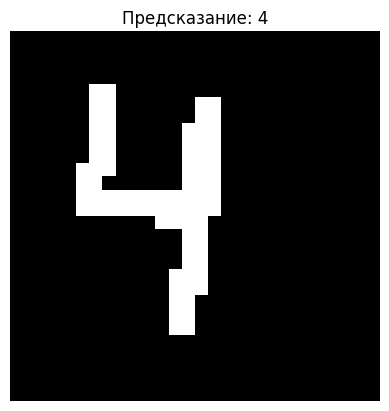

model_Nadam
1/1 [==============================] - 0s 81ms/step
Распознанное число: 4


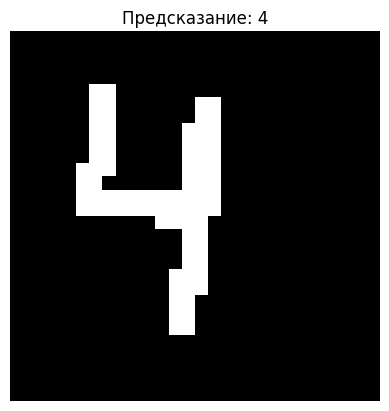

model_cnn
1/1 [==============================] - 0s 39ms/step
Распознанное число: 4


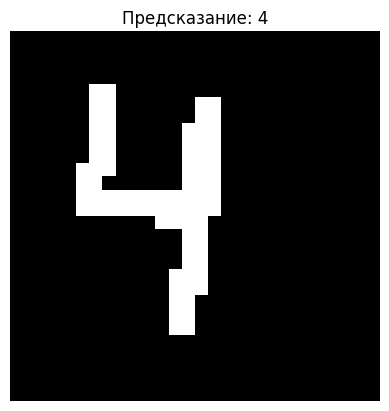

In [ ]:
import numpy as np
from PIL import Image


def load_and_predict_image(image_path, model):
    img = Image.open(image_path).convert('L')

    img = img.resize((28, 28))

    img_array = np.array(img) / 255.0

    img_array = img_array.reshape((1, 28, 28, 1))

    # plt.imshow(img)
    prediction = model.predict(img_array)
    print("Распознанное число:", np.argmax(prediction))

    plt.imshow(img, cmap='gray')
    plt.title(f"Предсказание: {np.argmax(prediction)}")
    plt.axis('off')  # Отключаем оси
    plt.show()


# Пример использования функции:
# Путь к изображению, загруженному пользователем
image_path = '../drawn_digit.png'
# load_and_predict_image(image_path, model)

print("model_MLP")
load_and_predict_image(image_path, model_MLP)
print("model_Nadam")
load_and_predict_image(image_path, model_Nadam)
print("model_cnn")
load_and_predict_image(image_path, model_cnn)